<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Housing-data" data-toc-modified-id="Housing-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Housing data</a></span><ul class="toc-item"><li><span><a href="#Import-housing-data-and-convert-it-to-csv" data-toc-modified-id="Import-housing-data-and-convert-it-to-csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import housing data and convert it to csv</a></span></li><li><span><a href="#Create-Test/Training-set" data-toc-modified-id="Create-Test/Training-set-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create Test/Training set</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualisation</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Prepare-for-Data" data-toc-modified-id="Prepare-for-Data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Prepare for Data</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Handling-Text-and-Categorical-Attributes" data-toc-modified-id="Handling-Text-and-Categorical-Attributes-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Handling Text and Categorical Attributes</a></span></li><li><span><a href="#Transformation-Pipeline" data-toc-modified-id="Transformation-Pipeline-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Transformation Pipeline</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li></ul></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Fine-Tune-the-model" data-toc-modified-id="Fine-Tune-the-model-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Fine-Tune the model</a></span></li></ul></li></ul></div>

In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Housing data

## Import housing data and convert it to csv

In [2]:
# ROOT ="https://github.com/ageron/handson-ml2/tree/master/"
root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
path = os.path.join("datasets", "housing")
url = root + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=url, housing_path=path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()


def load_housing_data(housing_path=path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [4]:
housing = load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

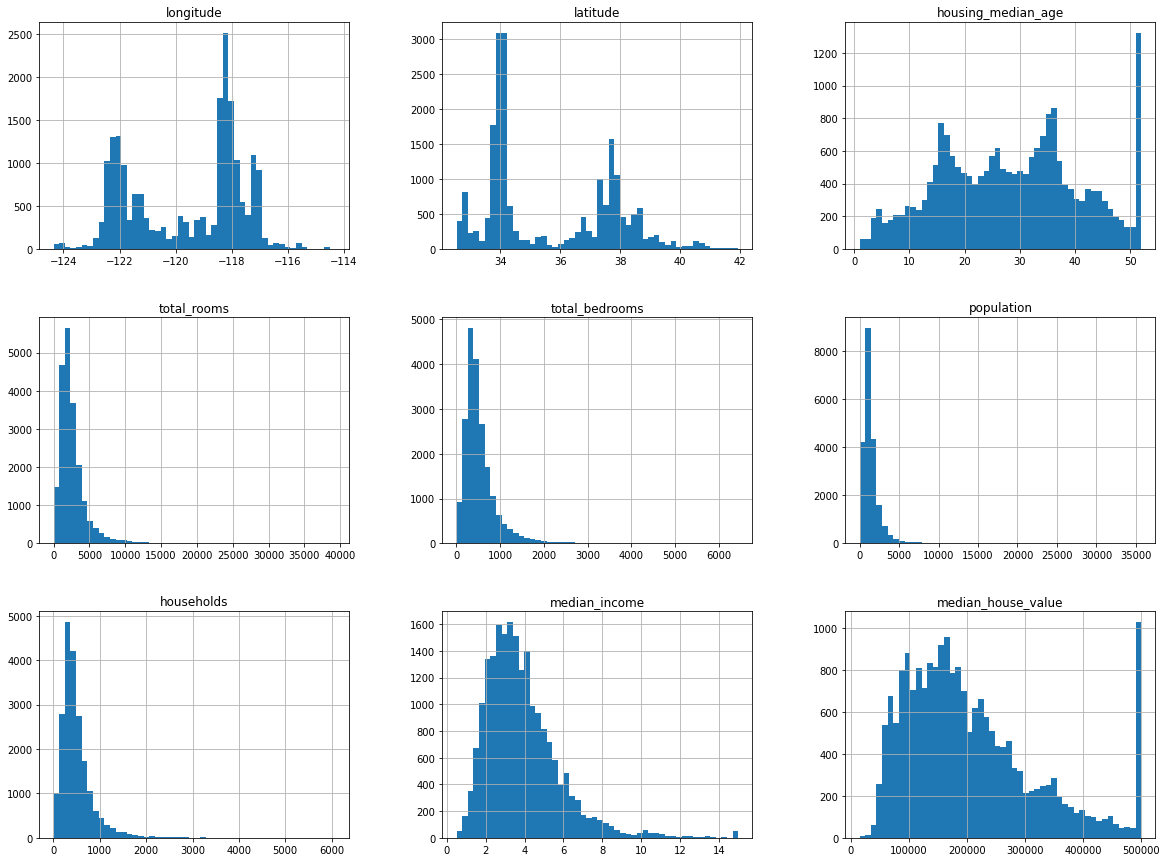

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

1. Median income 단위는 USD10,000 이고 150,000 이상의 수입에 대해서는 스케일 하여 150,000 이하로 조정되었다. 수입이 0.5 즉 50,000 이하 역시 조정. min = 0.4999 max=15.00001 참고.
2. Housing median age, Median house value 역시 스케일 된 값. 보통 median house value 같은 경우는 y값, 즉 예측값으로 놓는데 데이터가 스케일 되어 있으면 알고리즘에서 나오는 output이 한계값을 넘지 못하게 되므로 정확한 예측이 어렵다. 이럴 경우 클라이언트와 상의한다. 만약 클라이언트 쪽에서 여전히 조금 더 정확한 예측을 원한다고 한다면
     * 스케일 되어 있지 않는 정확한 데이터 수집
     * USD500,000 이상의 집값을 나타내는 지역의 데이터를 제거
3. 대부분의 variables이 right skewed distribution. Trasforming is required.
4. Total bedrooms, total rooms는 각 가구마다의 수가 아니고 전체의 수 이므로, 후에 correlation을 검토 시 total room은 각 가구마다의 수로 변환, total bedrooms는 total rooms의 비율로 변환하는 것이 유용할 것.

## Create Test/Training set

In [8]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)

In [9]:
sk_train_set, sk_test_set = train_test_split(housing, test_size=0.2, random_state=100)

1. 위의 방법도 좋지만, 만약 데이터가 충분하지 않다면 sampling bias 의 문제점이 생길 수 있다. 예를들어, 인구의 51%가 여성이고 49%가 남성이라면 1000명에게 survey를 하였을 시 510명의 여성과 490명의 남성으로 이루어져 있을 때 꽤 잘 수행된 survey라고 할 수 있으며 이를 stratified sampling이라고 한다.
2. stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population.
3. 이와 같은 sampling bias를 해결하기 위해, 아래와 같은 '묶음' 방법을 쓰기도 한다.
4. median income이 매우 중요한 인자라고 가정: 보통 1.5-6 사이(USD15,000-USD60,000) 에 많이 분포되어 있는데 6을 넘어가는 데이터도 있음. 각각의 stratum에 충분한 데이터가 있는 것이 중요하므로 많은 strata를 만들지 않는 것이 중요하다. median income의 경우 5개의 category에 담는다. 

<AxesSubplot:>

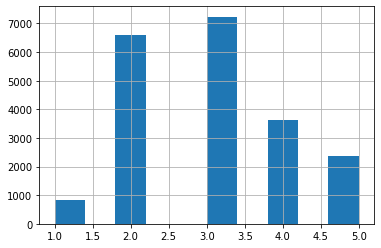

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0.,1.5,3.0,4.5,6., np.inf],
                              labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=100)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [13]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=100)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039729  0.037548     -5.717762      -0.243309
2  0.318847    0.318798  0.319525      0.212734      -0.015195
3  0.350581    0.350533  0.348110     -0.704809      -0.013820
4  0.176308    0.176357  0.179264      1.676285       0.027480
5  0.114438    0.114583  0.115552      0.973751       0.127011

income_cat 제거하기

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Visualisation

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

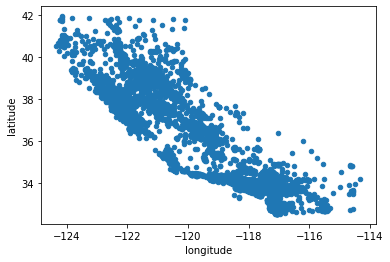

In [15]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")

위의 scatter plot을 보면 캘리포니아의 모양 같은데, alpha 옵션을 넣어 density도 표현해보자.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

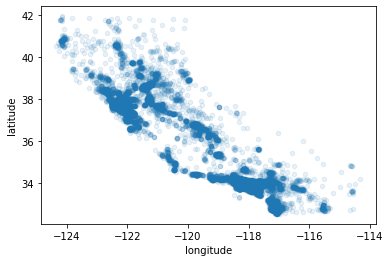

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

* The radius of each circle(s): population
* The colour(c): price
* used a predefiend color map (cmap) called jet, which ranges from blue(low) to red(high)

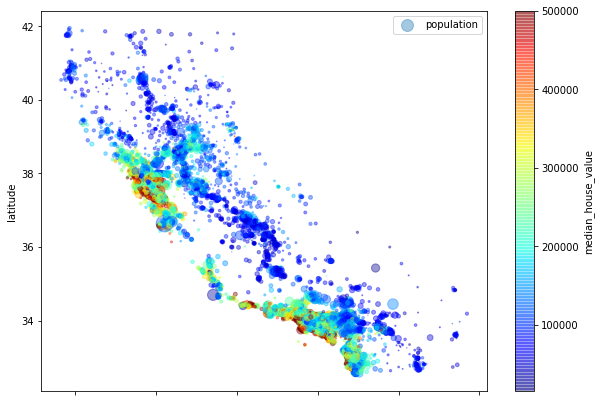

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()
plt.savefig("housing_prices_colours")
plt.show()

위의 지도에서 볼 수 있듯이, housing price가 location(바닷가 근처),population density와 밀접한 연관이 있음을 알 수 있다.

## Correlation

In [18]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686705
total_rooms           0.134724
housing_median_age    0.106142
households            0.067287
total_bedrooms        0.052120
population           -0.023676
longitude            -0.047238
latitude             -0.143568
Name: median_house_value, dtype: float64

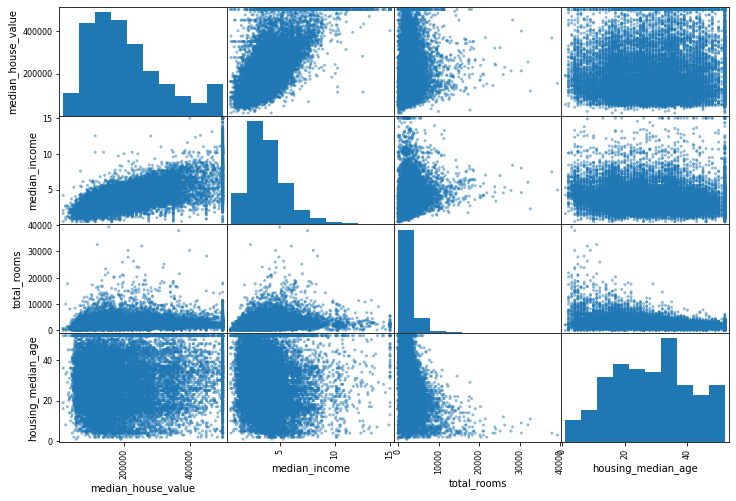

In [19]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_1 = scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

* median income과의 correlation이 가장 높음.
* 이전에 정리했 듯 각 가구마다의 total rooms, total bedrooms 그리고 population 을 계산하여 correlation 알아보자.

In [20]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] =housing["total_bedrooms"]/housing["total_rooms"]
housing["popuation_per_household"] = housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.686705
rooms_per_household        0.150273
total_rooms                0.134724
housing_median_age         0.106142
households                 0.067287
total_bedrooms             0.052120
popuation_per_household   -0.022063
population                -0.023676
longitude                 -0.047238
latitude                  -0.143568
bedrooms_per_room         -0.253654
Name: median_house_value, dtype: float64

* total rooms 나 total bedrooms 보다 bedrooms per room이 house value와의 상관관계가 더 크다.
* rooms per household가 total rooms 보다 조금 더 유용한 정보를 제공.
* bedrooms 수, 혹은 rooms대비 bedrooms 수가 적을 경우 house value이 높은 경향이 있다.(interesting!)

## Prepare for Data

In [21]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [22]:
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2126.    ,  434.    , 1164.    ,
        409.    ,    3.5332])

In [23]:
housing_num.median().values

array([-118.49  ,   34.26  ,   29.    , 2126.    ,  434.    , 1164.    ,
        409.    ,    3.5332])

In [24]:
X = imputer.transform(housing_num)
X

array([[-118.61  ,   34.22  ,   24.    , ..., 2474.    ,  780.    ,
           7.3252],
       [-122.19  ,   37.43  ,   39.    , ...,  937.    ,  406.    ,
           6.6136],
       [-118.01  ,   34.05  ,   37.    , ...,  813.    ,  173.    ,
           3.8125],
       ...,
       [-118.17  ,   34.1   ,   25.    , ..., 1922.    ,  652.    ,
           8.058 ],
       [-118.1   ,   33.97  ,   20.    , ..., 1461.    ,  516.    ,
           2.9821],
       [-122.96  ,   40.77  ,   29.    , ...,  753.    ,  270.    ,
           3.2891]])

In [25]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index= housing_num.index)
housing_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3553     -118.61     34.22                24.0       5256.0           758.0   
17151    -122.19     37.43                39.0       2392.0           420.0   
6308     -118.01     34.05                37.0        682.0           172.0   
4470     -118.17     34.09                36.0       3066.0           797.0   
4750     -118.32     34.04                39.0       2965.0           812.0   
...          ...       ...                 ...          ...             ...   
1976     -120.59     38.53                15.0        432.0            87.0   
14637    -117.20     32.80                36.0       4018.0          1067.0   
6785     -118.17     34.10                25.0       4444.0           647.0   
7031     -118.10     33.97                20.0       1878.0           548.0   
19782    -122.96     40.77                29.0       1637.0           297.0   

       population  households  median_income  
3553       2474.0       780.0         7.3252  
17151       937.0       406.0         6.6136  
6308        813.0       173.0         3.8125  
4470       3097.0       780.0         2.5523  
4750       2638.0       794.0         2.5320  
...           ...         ...            ...  
1976        208.0        73.0         3.6125  
14637      1620.0       842.0         2.3599  
6785       1922.0       652.0         8.0580  
7031       1461.0       516.0         2.9821  
19782       753.0       270.0         3.2891  

[16512 rows x 8 columns]

### Handling Text and Categorical Attributes

In [26]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
3553        <1H OCEAN
17151      NEAR OCEAN
6308        <1H OCEAN
4470        <1H OCEAN
4750        <1H OCEAN
4217        <1H OCEAN
19871          INLAND
8401        <1H OCEAN
5125        <1H OCEAN
11444       <1H OCEAN

In [27]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [4.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [28]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [30]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [31]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [32]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-118.61, 34.22, 24.0, ..., '<1H OCEAN', 6.7384615384615385,
        3.1717948717948716],
       [-122.19, 37.43, 39.0, ..., 'NEAR OCEAN', 5.891625615763547,
        2.3078817733990147],
       [-118.01, 34.05, 37.0, ..., '<1H OCEAN', 3.9421965317919074,
        4.699421965317919],
       ...,
       [-118.17, 34.1, 25.0, ..., '<1H OCEAN', 6.815950920245399,
        2.9478527607361964],
       [-118.1, 33.97, 20.0, ..., '<1H OCEAN', 3.63953488372093,
        2.8313953488372094],
       [-122.96, 40.77, 29.0, ..., 'INLAND', 6.062962962962963,
        2.7888888888888888]], dtype=object)

### Transformation Pipeline

In [33]:
num_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy="median")), 
                ('attribs_adder', CombinedAttributesAdder()),
                ('std_scaler', StandardScaler())
])

housing_num
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr[1:5]

array([[-1.31077392,  0.84419586,  0.82285949, -0.10887825, -0.27659896,
        -0.4346545 , -0.2421233 ,  1.44734976,  0.19287593, -0.06823975,
        -0.57873194],
       [ 0.7762382 , -0.73957495,  0.6636794 , -0.89326186, -0.86957968,
        -0.54583258, -0.85287998, -0.02926639, -0.6247676 ,  0.13821345,
         0.57807019],
       [ 0.69635257, -0.7208321 ,  0.58408935,  0.20028816,  0.62482737,
         1.50199599,  0.73823293, -0.69358815, -0.62956052,  0.0752893 ,
         0.69506384],
       [ 0.62145979, -0.74426067,  0.82285949,  0.15395907,  0.66069314,
         1.09045776,  0.77493075, -0.70428941, -0.71198313,  0.01934158,
         0.90515088]])

In [34]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)

## Modelling
### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

housing_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68388.47452867066

### DecisionTreeRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_pred = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69767.60575132, 71146.60690705, 68647.21875855, 67941.05630411,
       67419.59493637, 67582.79174874, 73010.79076868, 68562.99570066,
       73718.26135263, 76190.48438146])

In [38]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [69767.60575132 71146.60690705 68647.21875855 67941.05630411
 67419.59493637 67582.79174874 73010.79076868 68562.99570066
 73718.26135263 76190.48438146]
Mean:  70398.74066095837
Standard deviation:  2857.0409931305157


In [52]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("rmse score: " ,lin_rmse_scores)

display_scores(lin_rmse_scores)

rmse score:  [70704.64834781 70326.2276612  69545.61187535 64768.48853158
 67545.19938901 62894.85488679 68439.33563317 68440.77199309
 71955.21991942 71949.49737979]
Scores:  [70704.64834781 70326.2276612  69545.61187535 64768.48853158
 67545.19938901 62894.85488679 68439.33563317 68440.77199309
 71955.21991942 71949.49737979]
Mean:  68656.98556172202
Standard deviation:  2813.1953382023526


In [40]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_pred = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse 

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores:  [49447.29575814 52947.52193546 50061.12143761 48969.96602805
 48513.66076034 45664.01133249 51573.48584111 49242.25408479
 52665.1909947  54868.21906751]
Mean:  50395.27272402017
Standard deviation:  2517.1115716391396


## Fine-Tune the model

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
print("best params: ", grid_search.best_params_)
print("best estimator: ", grid_search.best_estimator_)

best params:  {'max_features': 8, 'n_estimators': 30}
best estimator:  RandomForestRegressor(max_features=8, n_estimators=30)


In [45]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64270.764293660875 {'max_features': 2, 'n_estimators': 3}
55354.67365637791 {'max_features': 2, 'n_estimators': 10}
52821.62128943196 {'max_features': 2, 'n_estimators': 30}
60391.228077921805 {'max_features': 4, 'n_estimators': 3}
52728.07470123881 {'max_features': 4, 'n_estimators': 10}
50171.99061701538 {'max_features': 4, 'n_estimators': 30}
58780.2342117766 {'max_features': 6, 'n_estimators': 3}
51484.89218325118 {'max_features': 6, 'n_estimators': 10}
50201.48699288495 {'max_features': 6, 'n_estimators': 30}
59327.8665185787 {'max_features': 8, 'n_estimators': 3}
52253.12466241173 {'max_features': 8, 'n_estimators': 10}
50163.5760973305 {'max_features': 8, 'n_estimators': 30}
62637.082270861705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54564.3023416617 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60415.74617505779 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52272.23405479466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

* max_feature:8, n_estimators:30 일 때 mean_score = 50163으로 가장 낮다.
* 이 값은 default hyperparameter일 때의 mean_score 값 50395보다 낮으므로 parameter tuning을 성공적으로 하였다고 볼 수 있다.

In [49]:
# Analyse the best models and their errors

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36694001641422974, 'median_income'),
 (0.16939368322817142, 'INLAND'),
 (0.11422373165811442, 'pop_per_hhold'),
 (0.06784751339298026, 'longitude'),
 (0.06476745916768348, 'latitude'),
 (0.05234324378966169, 'rooms_per_hhold'),
 (0.05113167449965962, 'bedrooms_per_room'),
 (0.04431488067038935, 'housing_median_age'),
 (0.016373129906689335, 'total_rooms'),
 (0.014600947264251582, 'population'),
 (0.01458589092559077, 'total_bedrooms'),
 (0.013709401503948051, 'households'),
 (0.004186099196149595, '<1H OCEAN'),
 (0.003927951837535656, 'NEAR OCEAN'),
 (0.0015515991668485988, 'NEAR BAY'),
 (0.00010277737809657633, 'ISLAND')]

* 여기서 덜 중요힌 attribute는 제거해볼 수 있다.

In [53]:
# Evaluate your system on the test set

final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48561.68698578926

In [60]:
# how precise this estimate(final rmse) is

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([46256.15264033, 50762.61644878])

*reference: Hands-on Machine Leraning with Scikit-Learn, Keras & Tensorflow by Aurélien Géron*